In [123]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

In [124]:
USE_CUDA = torch.cuda.is_available()
device = torch.device("cuda" if USE_CUDA else "cpu")
print("다음 기기로 학습합니다:", device)

다음 기기로 학습합니다: cpu


In [125]:
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [126]:
# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

# Dataset 구성 확인

In [127]:
# MNIST dataset 크기
print("train data 크기:", len(mnist_train), "      ", "test data 크기:",len(mnist_test))

train data 크기: 60000        test data 크기: 10000


In [128]:
# i번째 data확인
i=5343

In [130]:
# 4000번째 data확인
print(type(mnist_train[i]), len(mnist_train[i]))

<class 'tuple'> 2


위에서 train data가 60000개 이며, 그 중에 i번째 성분을 골라서 확인해보니, tuple로 2개의 요소가 묶여져 있음을 확인

In [147]:
first, second= mnist_train[i]
print("first type :", type(first), "       first len :", len(first), "         first size :", first.size())
print("second type :", type(second), "      second :", second)

first type : <class 'torch.Tensor'>        first len : 1          first size : torch.Size([1, 28, 28])
second type : <class 'int'>       second : 8


2개의 tuple을 분리하여 first 성분을 확인해보니, 1 x 28 x 28 행렬(image)인 Tensor이고, second는 이 행렬의 Label 정보(정답)을 가지고 있다.

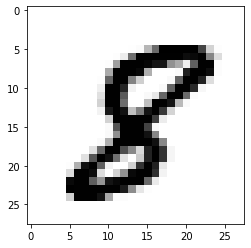

In [149]:
# image가 3차원이므로, 의미없는 1을 없애고 2차원으로 만들기 위해 view(28, 28) 진행하여 image확인
plt.imshow(first.view(28, 28), cmap='Greys', interpolation='nearest')

# Data loading과 Modeling

In [106]:
data_loader = DataLoader(dataset=mnist_train, batch_size=100, shuffle=True, drop_last=True)

In [114]:
print(len(data_loader), type(data_loader))

600 <class 'torch.utils.data.dataloader.DataLoader'>


* 전체 크기가 60000개인 data를 100개의 batch_size로 나누므로, data_loader는 600개 data로 구성됨.
* 이 때, data_loader의 한개 data는 자동으로 '100 x input차원'의 행렬이 된다.

In [104]:
# softmax의 Linear 함수를 위해 28 x 28 image를 1차원으로 바꾸고, 10개 숫자 분류를 해야하므로,
linear = nn.Linear(784, 10, bias=True).to(device)

In [121]:
# cost와 optimizer 정의
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [122]:
training_epochs = 15

for epoch in range(training_epochs): # 앞서 training_epochs의 값은 15로 지정함.
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader:
        # 배치 크기가 100이므로 아래의 연산에서 X는 (100, 784)의 텐서가 된다.
        X = X.view(-1, 28 * 28).to(device)
        # 레이블은 원-핫 인코딩이 된 상태가 아니라 0 ~ 9의 정수.
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.535034716
Epoch: 0002 cost = 0.359426379
Epoch: 0003 cost = 0.330938488
Epoch: 0004 cost = 0.316720337
Epoch: 0005 cost = 0.306803167
Epoch: 0006 cost = 0.300238997
Epoch: 0007 cost = 0.295368165
Epoch: 0008 cost = 0.290846020
Epoch: 0009 cost = 0.287643701
Epoch: 0010 cost = 0.284529626
Epoch: 0011 cost = 0.282080382
Epoch: 0012 cost = 0.279741734
Epoch: 0013 cost = 0.277910173
Epoch: 0014 cost = 0.276136696
Epoch: 0015 cost = 0.274232507
Learning finished


* Reference

 -. https://wikidocs.net/60324